In [1]:
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Parametros de amber de Julian 
---
AMBER Barrier (kcal/mol)
/hpcfs/home/dr.figueroa10/FFParmOpt/DATOS_Pre/STX_1.frcmod 

parametrizado con GAFF2 y metodologia RESP para las cargas (.log en archivos)

o -c -ce-cf   4    8.700       180.000           2.000  
O3-C2-C1-C77 ( en atom index )  
parametros para el dihedoro analizado en O5 C22 C23 C24  

Documentacion de parametros de amber. (cluster)  
vi /lustre/apps/anaconda/2/envs/18-amber/dat/leap/parm/gaff2.dat  


# Parametros de CHARMM 
---
/home/UANDES/dr.figueroa10/Documentos/FFParams/JohnErick/PARAMSCHARMGUI/STX_charmm/gromacs  
grep CG2DC1 charmm36_new.itp  | grep OG2D1  

CG2DC1  CG2DC1   CG2O2   OG2D1     9  1.800000e+02  5.857600e+00      2(multiplicad)  




k CHARMM  1.4034878165312947
Max val CHARMM 2.8069756330625895
k AMBER  2.175
Max val AMBER 4.35


Text(0, 0.5, 'K (Kcal/mol)')

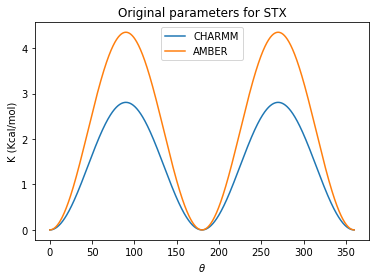

In [9]:
def dieh_CHARM(theta,phi,n,k):
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    print("k CHARMM ", k)
    print("Max val CHARMM", max(dihedral_CHARM))
    plt.plot(thetha,dihedral_CHARM,label="CHARMM")
    plt.grid()
    #return deihdral
def dieh_AMBER(theta,phi,n,k):
    dihedral_AMBER = k*(1+np.cos((n*theta-phi)*np.pi/180))
    print("k AMBER ", k)
    print("Max val AMBER",max(dihedral_AMBER))
    plt.plot(thetha,dihedral_AMBER,label="AMBER")
    plt,legend()
    plt.grid()

thetha= np.arange(0,360,0.1)
dieh_CHARM(thetha,180,2,(5.875/4.186))
## amber frcmod X-X-X-X 4(divider) 8.7(barrier) 180 (phase) 2(multiplicity)
## k = (barrier/divider)
dieh_AMBER(thetha,180,2,(8.7/4))
plt.title("Original parameters for STX")
plt.xlabel(r'$\theta$')
plt.ylabel("K (Kcal/mol)")

# General form for dihedrals

\begin{equation*}
\sum_{k=1}^{dihedrals} K[1 + cos(n_p\theta - \phi)] 
\end{equation*}  
$AMBER_{GAFF2}  barrier = 2.175  kcal/mol$  
$CHARMM  barrier  = 1,46875  kcal/mol$


# Does the charge derivation affect the parameters optimization ? 
--- 
- For AMBER.
    - bcc ( semi-empirical method for charge derivation)
        - $ k = 1,5408, \phi =-15,6053 , n_p =1,9266$
        - $ k = 1,4989, \phi =-0,6432  $ $(n_p =2)$	
    - RESP ( based on HF and Mulliken charges ) 
        - $ k = 1,5503, \phi =-16,1606 , n_p =1,9328$
        - $ k = 1,5057, \phi =-3.2668 $	$(n_p =2)$	
    

# Optimization of paramfit parameters
---
- Genetic Algorithm 
    1. Generations_to_conv = 20 
    2. Search Space (0.25 -0.75) - Same minima 
    3. Algorithm = BOTH ( simplex and genetic) aceleraters convergence - Same minima

  # Optimization of $k ,n_p$ and $\phi$ 
 

<style>
table {
    width:450%;
}
</style>
|            	|        	|  B3LYP	|          	|        	|   MP2   	|          	|             	|
|:----------:	|:------:	|:------:	|:--------:	|:------:	|:-------:	|:--------:	|:-----------:	|
|         Structure   	| $k$(kcal/mol)   | $n_p$      | $\phi$       | $k$(kcal/mol)     | $n_p$     | $\phi$      | $\Delta E_{(MP2 – B3LYP}$ |
| Conj Chain 	| 1,7119 	| 1,8659 	| -25,8033 	| 1,9039 	|  1,8834 	| -21,4799 	|    0,192    	|
|    CutL0   	| 1,7445 	| 1,8425 	| -31,2315 	| 1,9408 	|  1,7445 	| -39,4837 	|    0,1963   	|
|  CutL0_OH  	| 1,7342 	|  1,821 	| -39,4837 	| 1,9117 	| 1,18671 	| -32,9671 	|    0,1775   	|
|   CutL02   	| 1,6771 	|  1,795 	|  -48,026 	|  1,867 	|  1,8419 	|  32,6021 	|    0,1899   	|
|  CutL02_OH 	| 1,6736 	|  1,836 	| -48,4829 	| 1,8676 	|  1,8534 	| -36,6469 	|    0,194    	|
|     L0     	| 1,5408 	| 1,9266 	| -15,6053 	|   Running     	|    Running     	|   Running       	|             	|



# Optimization of $k $ and $\phi$ with fixed $n_p$

|           	|    B3LYP |	          	|   MP2  	|          	|             	|
|:---------:	|:------:	|:--------:	|:-------:	|:--------:	|-------------	|
|           	|   $k$(kcal/mol) 	|    $\phi$    	|   $k$(kcal/mol)    	|    $\phi$    	| $\Delta E_{(MP2 – B3LYP}$ 	|
|   CutL0   	| 1,5881 	|  -6,9156 	|  1,7871 	|  -2,103  	|    0,199    	|
|  CutL0_OH 	| 1,6108 	| -14,7296 	|  1,7825 	|  -9,7438 	|    0,1717   	|
|   CutL02  	| 1,4936 	|  -10,203 	|  1,7181 	|  -3,2337 	|    0,2245   	|
| CutL02_OH 	| 1,5306 	|   -21,4  	|  1,7254 	|  -11,26  	|    0,1948   	|
|     L0    	| 1,4989 	|  -0,6432 	| Running 	| Running 	|             	|

# What's next
---
CutLO_3 ( longer conjugated chain ) 

---
# Validation with conjugated chain
---
$\Delta k_{(MP2-B3LYP)}$  = 0.19 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.25 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.14 kcal/mol

K_mp2 =  1.9039
K_b3 =  1.7119
Diff = 0.19199999999999995


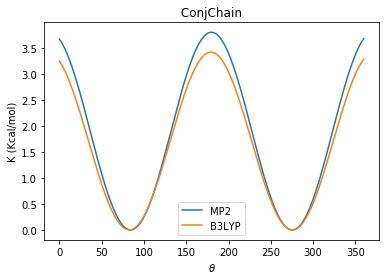

In [3]:
def dieh_plot(theta,phi,n,k,label):
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    plt.plot(thetha,dihedral_CHARM,label=label)
    plt.grid()
    plt.legend()
    
##VALIDATION-- ConjChain

dieh_plot(thetha,-21.4799,1.8834,1.9039,"MP2")
dieh_plot(thetha,-25.8033,1.8659,1.7119,"B3LYP" )
plt.title(" ConjChain ")
plt.xlabel(r'$\theta$')
plt.ylabel("K (Kcal/mol)")
print("K_mp2 = ",1.9039 )
print("K_b3 = ", 1.7119)
print("Diff =", 1.9039-1.7119)

In [4]:
Mp2_ConjCh0= -617.29628
Mp2_ConjCh1= -617.29572
Mp2_ConjCh10=-617.29536

B3_ConjCh0= -617.32062
B3_ConjCh1= -617.31966
B3_ConjCh10=-617.31947

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf 1")
print((Mp2_ConjCh0-Mp2_ConjCh1)*627.5, "\n")
print("Conf 0 - Conf 10")
print(-(Mp2_ConjCh0-Mp2_ConjCh10)*627.5, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_ConjCh0-B3_ConjCh1, "\n")
print("Conf 0 - Conf 10" )
print(B3_ConjCh0-B3_ConjCh10)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_ConjCh0-Mp2_ConjCh1)-(B3_ConjCh0-B3_ConjCh1))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_ConjCh0-Mp2_ConjCh10)-(B3_ConjCh0-B3_ConjCh10))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 1
-0.35140000004020067 

Conf 0 - Conf 10
0.5773000000405659 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0009599999999636566 

Conf 0 - Conf 10
-0.0011499999999387

 ----------- MP2-B3 0-1--------- 
0.25099999993699385

------------ MP2-B3 0-10-----------
0.14432499992096837


# Validation with CutL0
---
$\Delta k_{(MP2-B3LYP)}$  = 0.19 kcal/mol  
$\Delta\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

K_mp2 =  1.9408
K_b3 =  1.7445
Diff = 0.19630000000000014

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0006799999999884676 

Conf 0 - Conf 10
-0.0004799999999249849 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


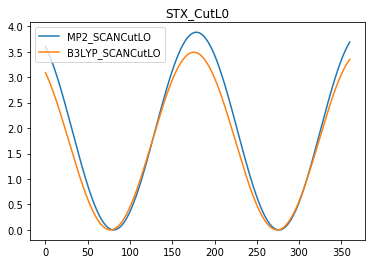

In [5]:
## VALIDATION SCAN CUTL0 -- 
dieh_plot(thetha,-31.2315,1.8425,1.9408,"MP2_SCANCutLO")
dieh_plot(thetha,-39.4837,1.8266,1.7445,"B3LYP_SCANCutLO")
plt.title("STX_CutL0")
print("K_mp2 = ",1.9408 )
print("K_b3 = ", 1.7445)
print("Diff =", 1.9408-1.7445)
print("")

Mp2_CutL00= -999.92527
Mp2_CutL01= -999.92459
Mp2_CutL010=-999.92479

B3_CutL00= -999.04719
B3_CutL01= -999.04613
B3_CutL010=-999.04663

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL00-Mp2_CutL01, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL00-Mp2_CutL010, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

# Validation with CutL0_OH
---
$\Delta k_{(MP2-B3LYP)}$  = 0.17 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

In [6]:
Mp2_CutL0_OH0= -1232.95092
Mp2_CutL0_OH1= -1232.9504
Mp2_CutL0_OH10=-1232.95005

B3_CutL0_OH0= -1232.25327
B3_CutL0_OH1= -1232.25237
B3_CutL0_OH10=-1232.2524

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL0_OH0-Mp2_CutL0_OH1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL0_OH0-Mp2_CutL0_OH10, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0005200000000513683 

Conf 0 - Conf 10
-0.0008700000000771979 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


k_B3LYP = 1.7342
k_MP2 = 1.9117
DIFF =  0.1775


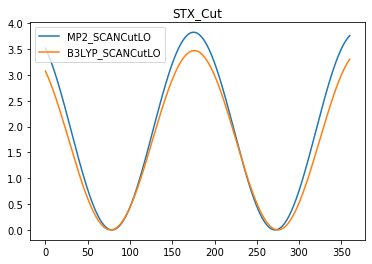

In [7]:
## VALIDATION SCAN CUTL0_OH -- 
dieh_plot(thetha,-32.9671,1.8671,1.9117,"MP2_SCANCutLO")
dieh_plot(thetha,39.4837,-1.8210,1.7342,"B3LYP_SCANCutLO")
plt.title("STX_Cut")
print("k_B3LYP =", 1.7342 )
print("k_MP2 =",1.9117 )
print("DIFF = ",1.9117 - 1.7342 )

# Validation with CutL0_2
---
$\Delta k_{(MP2-B3LYP)}$  = 0.189 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

In [8]:
Mp2_CutL02_0= -1228.54782
Mp2_CutL02_1= -1228.54712
Mp2_CutL021_0=-1228.54736

B3_CutL02_0=-1232.49512
B3_CutL02_1= -1232.49401
B3_CutL02_10=-1232.49453

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL02_0-Mp2_CutL02_1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL00-Mp2_CutL010, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0007000000000516593 

Conf 0 - Conf 10
-0.0004799999999249849 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


k_B3LYP =  1.867
k_MP2 =  1.6771
DIFF = 0.18989999999999996


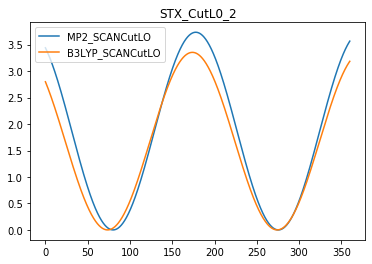

In [9]:
## VALIDATION SCAN CUTL0_2 -- 
dieh_plot(thetha,32.6021,-1.8419,1.8670,"MP2_SCANCutLO")
dieh_plot(thetha,48.0260,-1.7950,1.6771,"B3LYP_SCANCutLO")
plt.title("STX_CutL0_2")
print("k_B3LYP = ",1.8670)
print("k_MP2 = ",1.6771)
print("DIFF =",1.8670 - 1.6771)

# Validation with CutL0_2_OH
---
$\Delta k_{(MP2-B3LYP)}$  = 0.189 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.26 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.03 kcal/mol

In [10]:
Mp2_CutL02_OH_0= -1232.57343
Mp2_CutL02_OH_1= -1232.57291
Mp2_CutL02_OH_10= -1232.57258

B3_CutL02_OH_0=-1232.70114
B3_CutL02_OH_1=-1232.70019
B3_CutL02_OH_10=-1232.70024

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL02_OH_0-Mp2_CutL02_OH_1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL02_OH_0-Mp2_CutL02_OH_10, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL02_OH_0-B3_CutL02_OH_1, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL02_OH_0-B3_CutL02_OH_1)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL02_OH_0-Mp2_CutL02_OH_1)-(B3_CutL02_OH_0-B3_CutL02_OH_1))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL02_OH_0-Mp2_CutL02_OH_10)-(B3_CutL02_OH_0-B3_CutL02_OH_10))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0005199999998239946 

Conf 0 - Conf 10
-0.0008499999999003194 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0009499999998752173 

Conf 0 - Conf 10
-0.0009499999998752173

 ----------- MP2-B3 0-1--------- 
0.26982500003214227

------------ MP2-B3 0-10-----------
0.03137500006346272


k_B3LYP =  1.8676
k_MP2 =  1.6736
DIFF = 0.18989999999999996


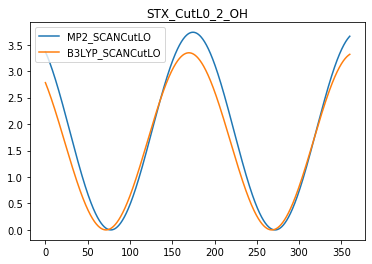

In [11]:
## VALIDATION SCAN CUTL0_2_OH -- 
dieh_plot(thetha,-36.6469,1.8534,1.8676,"MP2_SCANCutLO")
dieh_plot(thetha,-48.4829,1.8360,1.6736,"B3LYP_SCANCutLO")
plt.title("STX_CutL0_2_OH")
print("k_B3LYP = ",1.8676)
print("k_MP2 = ",1.6736)
print("DIFF =",1.8670 - 1.6771)

# Influence of the increase in the number of conformations 

Text(0.5, 1.0, 'STX _ all  atoms')

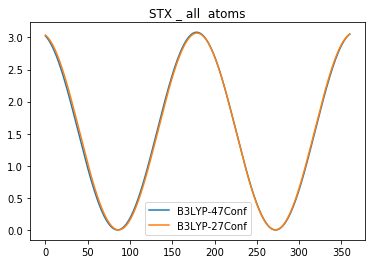

In [13]:
## Adittion of conformations to paramfit. 
dieh_plot(thetha,-15.6052,1.9266,1.5408,"B3LYP-47Conf" )
dieh_plot(thetha,-11.6995,1.9437,1.5344,"B3LYP-27Conf" )
plt.title("STX _ all  atoms")